# Basic Python Programming
## For Mechatronic Systems Development

---
### Python as a Language
- High-level, interpreted, dynamically typed
- Supports multiple paradigms: Procedural, Object-oriented, and Functional
- **Batteries included:** rich standard library
- Industry standard for robotics (ROS, simulation, data science)
- Readable syntax that encourages clean code

## Why Python for Mechatronics?

### Advantages
- Fast prototyping and iteration
- Extensive libraries: NumPy, SciPy, matplotlib
- ROS (Robot Operating System) native support
- Easy to learn but powerful

### Limitations
- Slower than C/C++ for real-time
- Good enough for most control loops (100 Hz+)
- Use C/C++ for ultra-low-latency hardware drivers

## Variables and Basic Types
- No type declaration needed – Python infers types
- Variables are names that bind to objects

In [24]:
# Numeric types
answer = 42                    # int
temperature = 36.5             # float
pi = 3.14159                   # float

# String type
greeting = "Hello, Python!"    # str
name = 'Alice'                 # str

# Boolean type
is_active = True               # bool
is_error = False               # bool

print(f"Temperature: {temperature}, Active: {is_active}")

Temperature: 36.5, Active: True


## Arithmetic and Comparison Operators

In [25]:
x = 10
y = 3

print(x + y)      # 13    (addition)
print(x // y)     # 3     (floor division)
print(x % y)      # 1     (modulo / remainder)
print(x ** y)     # 1000  (exponentiation)

# Comparison
print(x > y)      # True
print(0.0 <= temperature <= 100.0)  # Chaining comparisons

13
3
1
1000
True
True


## Lists and List Comprehensions
Lists are ordered, mutable collections. List comprehensions offer a concise way to create them.

In [26]:
data = [1, 2, 3]
data.append(4)

# List comprehension: sensor data filtering
readings = [0.1, 0.5, 2.3, 0.2, 1.1]
valid = [r for r in readings if r < 2.0]
print(f"Valid readings: {valid}")

Valid readings: [0.1, 0.5, 0.2, 1.1]


## Dictionaries and Control Flow
Dictionaries map keys to values, ideal for configurations.

In [27]:
config = {
    "sample_rate_hz": 100,
    "max_voltage": 12.0,
    "port": "COM3",
}

temperature = 85.0
if temperature > 80.0:
    print("Warning: high temperature!")
else:
    print("Normal range.")

## Exercise 1 Logging Simple Sensor data

PseudoCode:
```
BEGIN PROGRAM

    DEFINE system_name

    INITIALIZE temperature_c
    INITIALIZE voltage

    DEFINE safe_temperature_min
    DEFINE safe_temperature_max
    DEFINE safe_voltage_min
    DEFINE safe_voltage_max

    READ temperature sensor → temperature_c
    READ voltage sensor → voltage

    CONVERT temperature_c to temperature_f

    IF temperature_c is within safe_temperature range THEN
        temperature_safe ← TRUE
    ELSE
        temperature_safe ← FALSE
    END IF

    IF voltage is within safe_voltage range THEN
        voltage_safe ← TRUE
    ELSE
        voltage_safe ← FALSE
    END IF

    IF temperature_safe AND voltage_safe THEN
        system_status ← "OK"
    ELSE
        system_status ← "FAULT"
    END IF

    PRINT system_name
    PRINT temperature in Celsius and Fahrenheit
    PRINT voltage
    PRINT system_status

END PROGRAM

```

In [4]:
def celsius_to_fahrenheit(temp_c: float) -> float:
    return temp_c * 9 / 5 + 32


temperature_c = 70.0
voltage = 12.0
system_name = "Motor Controller"
is_running = True

temperature_f = celsius_to_fahrenheit(temperature_c)

temp_safe = 0.0 <= temperature_c <= 80.0
voltage_safe = 0.0 <= voltage <= 24.0
system_safe = temp_safe and voltage_safe

status = "OK" if system_safe else "FAULT"

print(
    f"[{system_name}] "
    f"Temp: {temperature_c:.1f}°C ({temperature_f:.1f}°F), "
    f"Voltage: {voltage:.1f} V, "
    f"Status: {status}"
)


[Motor Controller] Temp: 70.0°C (158.0°F), Voltage: 12.0 V, Status: OK



# Exercise 2: Sensor Data Cleaning
**Context:** You receive a raw string from a serial port connected to a temperature sensor. The string is "noisy" and contains extra whitespace and a prefix.

**Task:**
1. Clean the string `"  TEMP_DATA:25.678  "`.
2. Remove the whitespace and the prefix `"TEMP_DATA:"`.
3. Convert the remaining value to a `float`.
4. Use an **f-string** to print the result rounded to **2 decimal places** with the unit "°C".



In [ ]:
raw_data = "  TEMP_DATA:25.678  "
value_str = raw_data.strip().replace("TEMP_DATA:", "")
temp = float(value_str)
print(f"Current Temperature: {temp:.2f}°C")



# Exercise 3: Actuator Command Filtering
**Context:** A robot controller generates a list of motor torque commands (in Nm). However, the motor driver has a physical safety limit of **5.0 Nm**.

**Task:**
1. Given the list: `torques = [1.2, 5.5, 0.8, 10.2, 4.9, -2.1, 7.0]`
2. Use a **List Comprehension** to create a new list `safe_torques`.
3. This list should only contain values where the *absolute value* is less than or equal to `5.0`.
4. Append a "Home" command value of `0.0` to the end of your `safe_torques` list.


In [ ]:
torques = [1.2, 5.5, 0.8, 10.2, 4.9, -2.1, 7.0]
safe_torques = [t for t in torques if abs(t) <= 5.0]
safe_torques.append(0.0)
print(f"Validated Commands: {safe_torques}")

# Exercise 4: Robot State Handling (Tuples & Unpacking)

**Context:** A GPS module returns a tuple containing `(latitude, longitude, altitude)`. You need to process this coordinate.

**Task:**
1. Create a tuple called `raw_gps` with values `(10.823, 106.629, 5.0)`.
2. **Unpack** the first two values into variables `lat` and `lon`, and ignore the altitude using the "underscore" (`_`) convention or by slicing.
3. Write a function `get_velocity()` that returns a **tuple** of two values: `(vx, vy)`.
4. Call the function and unpack the result into `vel_x` and `vel_y`. Print them using an f-string.

In [ ]:
raw_gps = (10.823, 106.629, 5.0)
lat, lon, _ = raw_gps # Unpacking

def get_velocity():
    return (0.5, -0.2)

vel_x, vel_y = get_velocity()
print(f"Velocity: x={vel_x} m/s, y={vel_y} m/s")

# Exercise 5: Sensor Management (Dictionaries & Sets)

**Context:** You are managing a fleet of sensors. You need to store their configurations and ensure you have a list of unique sensor types currently active.

**Task:**
1. Create a **dictionary** `sensor_cfg` with keys: `"id"`, `"type"`, and `"range"`. Assign them values `101`, `"Lidar"`, and `[0.1, 30.0]`.
2. Update the `"range"` in the dictionary to `[0.1, 50.0]` and add a new key `"status"` with the value `"active"`.
3. Given a list of active types: `active_types = ["Lidar", "Camera", "Lidar", "IMU", "Camera"]`.
4. Use a **Set** to find the unique types in `active_types` and print the count of unique sensors found.

In [ ]:
sensor_cfg = {"id": 101, "type": "Lidar", "range": [0.1, 30.0]}
sensor_cfg["range"] = [0.1, 50.0]
sensor_cfg["status"] = "active"

active_types = ["Lidar", "Camera", "Lidar", "IMU", "Camera"]
unique_sensors = set(active_types)
print(f"Unique types: {unique_sensors}, Count: {len(unique_sensors)}")

# Exercise 6: Safety Interlock System (if/elif/else)

**Context:** You are writing a supervisor module for a robotic arm. The system must decide its `safety_mode` based on a laser scanner distance (`dist`) in meters and a user `emergency_stop` boolean.

**Task:**
1. Define `dist = 0.8` and `emergency_stop = False`.
2. Write a logic block to set a variable `safety_mode` based on these rules:
    - If `emergency_stop` is `True`, mode is **"ESTOP"**.
    - Else if `dist` is less than `0.5`, mode is **"COLLISION"**.
    - Else if `dist` is between `0.5` and `1.5` (inclusive), mode is **"WARNING"**.
    - Otherwise, mode is **"NORMAL"**.


In [ ]:
dist = 0.8
emergency_stop = False

if emergency_stop:
    safety_mode = "ESTOP"
elif dist < 0.5:
    safety_mode = "COLLISION"
elif 0.5 <= dist <= 1.5:
    safety_mode = "WARNING"
else:
    safety_mode = "NORMAL"

led_color = "RED" if safety_mode != "NORMAL" else "GREEN"
print(f"System: {safety_mode}, LED: {led_color}")

# Exercise 7: Battery Polling & Logging (loops)

**Context:** You need to monitor a drone's battery level during a startup sequence.

**Task:**
1. Given a list of simulated voltage readings: `voltages = [12.6, 12.5, 12.2, 11.8, 11.5, 10.8, 10.2]`.
2. Use a **for loop** with `enumerate` to print each reading and its "Minute" index.
3. Use a **while loop** to simulate "draining" a single battery value. Start at `v = 12.0`. In each loop, subtract `0.5`. Stop the loop and print "Low Battery!" if `v` drops below `10.5`.
4. **Challenge:** Loop through the `voltages` list. Use `continue` to skip any reading above `12.0` and `break` the loop immediately if a reading falls below `11.0`. Print the readings that don't trigger those conditions.

In [ ]:
voltages = [12.6, 12.5, 12.2, 11.8, 11.5, 10.8, 10.2]

# 1. Enumerate
for i, v in enumerate(voltages):
    print(f"Minute {i}: {v}V")

# 2. Filtering Logic
print("Filtered Readings:")
for v in voltages:
    if v > 12.0: continue
    if v < 11.0: break
    print(v)

# Exercise 8: Motor Control Supervisor

**Context:** You are writing a function to command a motor. For safety, the motor has a strict physical limit of **1000 RPM**. Any command exceeding this must be rejected to prevent hardware damage.

**Task:**
1. Define a function `send_motor_command(rpm: float, motor_id: int = 0)`.
2. Inside the function, if `rpm` is greater than `1000`, **raise** a `ValueError` with the message `"Safety Limit Exceeded"`.
3. The function should return a **tuple** containing `(motor_id, rpm)` to confirm the command was sent.
4. **Call the function** inside a `try/except` block. 
   - Test it once with `rpm = 500`.
   - Test it once with `rpm = 1200` and catch the `ValueError` to print a safety alert.

In [ ]:
def send_motor_command(rpm: float, motor_id: int = 0) -> tuple[int, float]:
    """Sends a speed command to a specific motor with safety checks."""
    if rpm > 1000:
        raise ValueError(f"Safety Limit Exceeded: {rpm} RPM is too high!")
    
    # Simulate sending to hardware
    return (motor_id, rpm)

# Testing the implementation
commands_to_test = [500, 1200]

for cmd in commands_to_test:
    try:
        m_id, speed = send_motor_command(cmd, motor_id=1)
        print(f"SUCCESS: Motor {m_id} set to {speed} RPM")
    except ValueError as e:
        print(f"CRITICAL ALERT: {e}")

# Exercise 9: Simulated Sensor Data Logger

**Context:** You are building a system to monitor a **Pressure Sensor**. You need a class to represent the physical sensor and a data structure to store history.

**Task:**
1. Create a class `PressureSensor` with a private attribute `_pressure`.
2. Implement a method `update_reading(value: float)` that checks if the value is between **0.0 and 10.0 bar**. If not, raise a `ValueError`.
3. Use a `@property` to allow read-only access to the current pressure.
4. Create a list called `sensor_log`.
5. Write a loop that simulates 3 readings: `[2.5, 4.8, 11.0]`. 
6. For each reading, use a `try/except` block to update the sensor. If successful, append a **dictionary** to `sensor_log` with the keys `"id"`, `"val"`, and `"status"`.

In [ ]:
class PressureSensor:
    def __init__(self, sensor_id: str):
        self.id = sensor_id
        self._pressure = 0.0

    def update_reading(self, value: float):
        if not 0.0 <= value <= 10.0:
            raise ValueError(f"Pressure out of safety limits: {value}")
        self._pressure = value

    @property
    def pressure(self):
        return self._pressure

# Simulation Logic
my_sensor = PressureSensor("PS-01")
sensor_log = []
raw_inputs = [2.5, 4.8, 11.0]

for val in raw_inputs:
    try:
        my_sensor.update_reading(val)
        status = "OK"
    except ValueError as e:
        print(f"Warning: {e}")
        status = "ERROR"
    
    sensor_log.append({"id": my_sensor.id, "val": val, "status": status})

print(f"Final Log: {sensor_log}")

# Exercise 10: Robotic Reachability & Profiling

**Context:** You are calculating the position of a 1-DOF robot arm's end-effector. You also need to measure how long the calculation takes to ensure your control loop can run at a high frequency.

**Task:**
1. Import `math` and `datetime`.
2. Define `arm_length = 1.5` (meters) and `target_angle_deg = 30.0`.
3. Record the **start time** using `datetime.now()`.
4. Convert the angle to **radians**.
5. Calculate the end-effector height ($y = L \cdot \sin(\theta)$) and reach ($x = L \cdot \cos(\theta)$).
6. Record the **end time** and calculate the total duration in microseconds.
7. Print the results ($x, y$) and the execution time.

In [1]:
import math
from datetime import datetime

# 1. Inputs
arm_length = 1.5
angle_deg = 30.0

# 2. Timing Start
start_time = datetime.now()

# 3. Calculations
angle_rad = math.radians(angle_deg)
x = arm_length * math.cos(angle_rad)
y = arm_length * math.sin(angle_rad)

# 4. Timing End
duration = datetime.now() - start_time

print(f"Coordinates: x={x:.3f}m, y={y:.3f}m")
print(f"Calculation took: {duration.total_seconds() * 10**6:.2f} microseconds")

Coordinates: x=1.299m, y=0.750m
Calculation took: 97.00 microseconds


# Exercise 11: Multi-Axis IMU Data Processing

**Context:** You are collecting raw data from a 3-axis IMU (Inertial Measurement Unit) that measures acceleration in $X$, $Y$, and $Z$. The sensor sends data as a continuous 1D stream.

**Task:**
1. Create a 1D NumPy array called `raw_imu` with 12 elements (representing 4 time steps, each with $X, Y, Z$ readings). Use `np.array([0.1, 0.2, 9.8, 0.15, 0.22, 9.78, 0.12, 0.21, 9.81, 0.11, 0.23, 9.79])`.
2. Inspect and print the **shape** and **dtype** of this array.
3. **Reshape** the data into a 2D matrix called `imu_matrix` where each **row** represents one time step and the **columns** are $X, Y, Z$.
4. Calculate the total **size** of the matrix to verify no data was lost.

In [3]:
import numpy as np
raw_imu = np.array([0.1, 0.2, 9.8, 0.15, 0.22, 9.78, 0.12, 0.21, 9.81, 0.11, 0.23, 9.79])

# Reshape to (4 time steps, 3 axes)
imu_matrix = raw_imu.reshape(4, 3)

print(f"Shape: {imu_matrix.shape}") # (4, 3)
print(f"Time Step 1 (X,Y,Z): {imu_matrix[0]}")

Shape: (4, 3)
Time Step 1 (X,Y,Z): [0.1 0.2 9.8]


# Exercise 12: Sensor Fusion & Sorting

**Context:** You have two separate 1D arrays representing distance readings from two Ultrasonic sensors. You need to combine them and sort them to find the "minimum safe distance" detected across the entire system.

**Task:**
1. Define `sensor_left = np.array([1.5, 0.8, 2.3])` and `sensor_right = np.array([2.1, 0.5, 1.9])`.
2. **Concatenate** these into a single array named `all_readings`.
3. Use `np.sort()` to order the readings from smallest to largest.
4. **Reshape** `all_readings` into a 2D array with 3 rows and 2 columns. Inspect the output: does the sorting order stay consistent across rows?

---

In [4]:
sensor_left = np.array([1.5, 0.8, 2.3])
sensor_right = np.array([2.1, 0.5, 1.9])

all_readings = np.concatenate((sensor_left, sensor_right))
sorted_readings = np.sort(all_readings)

# Reshape into a 3x2 matrix
final_matrix = sorted_readings.reshape(3, 2)
print("Sorted & Reshaped:\n", final_matrix)

Sorted & Reshaped:
 [[0.5 0.8]
 [1.5 1.9]
 [2.1 2.3]]


# Exercise 13: Robot Sensor Data Extraction

**Context:** You have a multi-sensor array providing data. You need to combine data from two different observation periods and extract specific "Region of Interest" (ROI) coordinates for a control loop.

**Task:**
1. Create two 2D arrays, `period_1` and `period_2`. Both should be **(2x3)** matrices. 
   - `period_1`: `[[10, 11, 12], [20, 21, 22]]`
   - `period_2`: `[[30, 31, 32], [40, 41, 42]]`
2. **Vertically Stack** them into a single array called `full_data` (Shape: 4x3).
3. Using **Slicing**, extract the **middle column** (index 1) across all rows.
4. Using **Indexing**, extract a sub-matrix containing the **last two rows** and the **last two columns**.
5. Use `.copy()` to create a backup of `full_data` called `data_backup`.

In [5]:
import numpy as np

# 1. Setup
p1 = np.array([[10, 11, 12], [20, 21, 22]])
p2 = np.array([[30, 31, 32], [40, 41, 42]])

# 2. Vstack (Rows: Sensors/Time, Cols: X,Y,Z)
full_data = np.vstack((p1, p2))

# 3. Middle Column (e.g., all Y-coordinates)
y_coords = full_data[:, 1]

# 4. Sub-matrix (Last 2 rows, Last 2 columns)
sub_matrix = full_data[2:, 1:]

# 5. Deep Copy
data_backup = full_data.copy()

print(f"Full Shape: {full_data.shape}")
print(f"Sub-matrix:\n{sub_matrix}")

Full Shape: (4, 3)
Sub-matrix:
[[31 32]
 [41 42]]


# Exercise 14: Sensor Bias Correction (Broadcasting)

**Context:** You are reading data from a 3-axis accelerometer. However, the sensor has a constant "zero-offset" error (bias) on each axis that needs to be subtracted to get accurate physical readings.

1. Create a 2D array `raw_accel` (4 time steps × 3 axes) using:
   `[[0.1, 0.1, 9.9], [0.1, 0.1, 9.9], [0.2, 0.0, 9.8], [0.1, 0.2, 9.9]]`.
2. Define a 1D "bias" vector: `bias = np.array([0.1, 0.1, 9.8])`.
3. Use **broadcasting** to subtract the `bias` from `raw_accel` to create `clean_accel`.
4. Multiply `clean_accel` by a scalar `9.81` to convert the readings from "g" to $m/s^2$.

In [6]:
import numpy as np
raw_accel = np.array([[0.1, 0.1, 9.9], [0.1, 0.1, 9.9], 
                      [0.2, 0.0, 9.8], [0.1, 0.2, 9.9]])
bias = np.array([0.1, 0.1, 9.8])

# Subtract bias (Broadcasting 1D across 2D)
clean_accel = raw_accel - bias
# Convert units
accel_ms2 = clean_accel * 9.81
print(accel_ms2)

[[ 0.     0.     0.981]
 [ 0.     0.     0.981]
 [ 0.981 -0.981  0.   ]
 [ 0.     0.981  0.981]]


# Exercise 15: System Performance Analysis (Aggregation)

**Context:** You have a matrix representing the power consumption (in Watts) of 4 different motors over 5 minutes of a test cycle.

1. Generate a 4x5 matrix of random floats between 0.0 and 10.0 using `np.random.default_rng()`.
2. Find the **Total Power** consumed by the whole system (sum of all elements).
3. Find the **Average Power** consumed by *each motor* over the 5 minutes (hint: `axis=1`).
4. Find the **Peak Power** recorded for *each time step* (hint: `axis=0`).
5. **Transpose** the matrix so that rows represent "Time" and columns represent "Motors". Print the new shape.

In [7]:
rng = np.random.default_rng(seed=42)
power_matrix = rng.random((4, 5)) * 10

total_sys = power_matrix.sum()
avg_per_motor = power_matrix.mean(axis=1) # Average of each row
peak_per_step = power_matrix.max(axis=0)  # Max of each column

time_series_view = power_matrix.T # Transpose
print(f"Total: {total_sys:.2f}W, New Shape: {time_series_view.shape}")

Total: 114.77W, New Shape: (5, 4)


## Classes and Objects
Objects group related data and behavior. In Mechatronics, this is used for hardware abstraction.

In [28]:
class Motor:
    """Motor command with validation."""
    def __init__(self) -> None:
        self._command = 0.0 # Private attribute convention

    def set_command(self, value: float) -> None:
        if not 0.0 <= value <= 6.29: # Validation
            raise ValueError(f"Out of range: {value}")
        self._command = value

    @property
    def command(self) -> float:
        return self._command

motor = Motor()
motor.set_command(3.14)
print(f"Motor Command: {motor.command}")

Motor Command: 3.14


## Visualization with Matplotlib (2D & 3D)
Plotting is essential for understanding system behavior.

In [22]:
!pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable


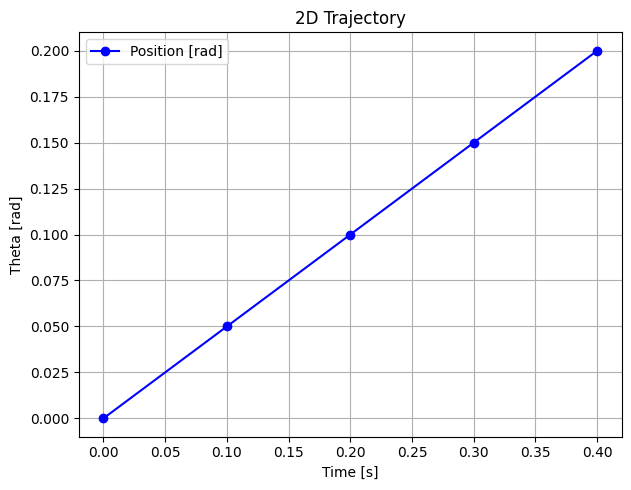

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mechatronic_data():
    """
    Visualizes 2D position data and 3D helical trajectories.
    Demonstrates professional plotting practices by avoiding global state.
    """
    # 1. Generate Data using NumPy (Lecture Topic 2)
    times = np.linspace(0, 0.4, 5)
    positions = [0.0, 0.05, 0.1, 0.15, 0.2]
    
    # Helical trajectory (Spiral)
    t_3d = np.linspace(0, 4 * np.pi, 100)
    x = np.cos(t_3d)
    y = np.sin(t_3d)
    z = t_3d / (2 * np.pi)

    # 2. Setup Figure (Professional layout)
    fig = plt.figure(figsize=(12, 5))

    # --- Subplot 1: 2D Trajectory ---
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(times, positions, 'b-o', label="Position [rad]")
    ax1.set_xlabel("Time [s]")
    ax1.set_ylabel("Theta [rad]")
    ax1.set_title("2D Trajectory")
    ax1.grid(True)
    ax1.legend()
    
    plt.tight_layout()
    plt.show()

# Professional Entry Point (Lecture Topic 3)
if __name__ == "__main__":
    plot_mechatronic_data()

In [12]:
!pip install --upgrade matplotlib --user

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Explicitly import the 3D toolkit to register the '3d' projection
from mpl_toolkits.mplot3d import Axes3D 

# 1. Generate helical (spiral) trajectory data
t = np.linspace(0.0, 4.0 * np.pi, 200)  # time parameter
x = np.cos(t)                           # x-position
y = np.sin(t)                           # y-position
z = t / (2 * np.pi)                     # height

# 2. Setup Figure and 3D Axis
fig = plt.figure(figsize=(8, 6))

# Using the projection keyword handles the registration internally
ax = fig.add_subplot(111, projection='3d')

# 3. Plotting
ax.plot(x, y, z, label="Helical trajectory", color='blue', linewidth=2)

# 4. Labeling for Mechatronic systems (Time-based height)
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (Height/Time)")
ax.set_title("Robot End-Effector 3D Trajectory")
ax.legend()

plt.tight_layout()
plt.show()

ValueError: Unknown projection '3d'

<Figure size 800x600 with 0 Axes>

## Good Practices Summary
1. **Use type hints**
2. **Name clearly** (e.g., `position_rad`)
3. **Single Responsibility** (One class/function = one purpose)
4. **Handle exceptions**
5. **Document functions** with docstrings
6. **DRY principle** (Don't Repeat Yourself)

## NumPy Fundamentals for Mechatronics
In mechatronics, NumPy is used to handle sensor arrays, coordinate transformations, and control matrices.
### 1. Array Creation and Inspection
Instead of standard Python lists, we use numpy.ndarray for faster mathematical operations.

In [36]:
import numpy as np

# Creating an array from a list
sensor_readings = np.array([1.2, 3.4, 0.8, 2.5])

# Creating arrays of zeros or ones (useful for pre-allocating memory)
voltage_buffer = np.zeros(10)
control_constants = np.ones(3)

# Creating a range (useful for time-series data)
# Start at 0, stop before 2, step by 0.5
time_steps = np.arange(0, 2, 0.5)

print(f"Time steps: {time_steps}")
print(f"Array Shape: {time_steps.shape}") # (4,)

Time steps: [0.  0.5 1.  1.5]
Array Shape: (4,)


## 2. Basic Operations (Element-wise)

In engineering, we often need to scale values (e.g., converting ADC units to Voltage).

In [37]:
# Scalar multiplication (Scaling)
raw_readings = np.array([102, 512, 1023])
normalized = raw_readings / 1023.0

# Addition of two signals
signal_a = np.array([1, 2, 3])
noise = np.array([0.1, -0.1, 0.2])
combined = signal_a + noise

print(f"Noisy signal: {combined}")

Noisy signal: [1.1 1.9 3.2]


## 3. Indexing, Slicing, and Reshaping

You can extract specific segments of a data stream or reshape 1D data into matrices.

In [38]:
data_stream = np.array([10, 20, 30, 40, 50])

# Slicing: get the first three elements
start_burst = data_stream[0:3]

# Reshaping: convert 6 elements into a 2x3 matrix (e.g., IMU data)
imu_data = np.array([0.1, 0.2, 0.3, -0.1, -0.2, -0.3])
rotation_matrix = imu_data.reshape(2, 3)

print(f"Reshaped Data:\n{rotation_matrix}")

Reshaped Data:
[[ 0.1  0.2  0.3]
 [-0.1 -0.2 -0.3]]


In [40]:
import numpy as np

# 1. Create a 1D array of 12 elements (e.g., raw readings)
raw_readings = np.arange(12) 
# Result: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# 2. Reshape to a 2D array (3 rows, 4 columns)
# This could represent 3 sensors taking 4 readings each
sensor_matrix = raw_readings.reshape(3, 4)

print("Original 1D Array:\n", raw_readings)
print("\nReshaped 2D Matrix:\n", sensor_matrix)

# 3. Reshape to a 3D array (2 pages, 3 rows, 2 columns)
# Represents 2 sensor stations, 3 time steps, 2 axes each
volumetric_data = raw_readings.reshape(2, 3, 2)

print("\nReshaped 3D Tensor:\n", volumetric_data)


Original 1D Array:
 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Reshaped 2D Matrix:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Reshaped 3D Tensor:
 [[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]
